# Step 1: Load and Merge the Datasets

In [ ]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#Ignore the warnings
import warnings
warnings.filterwarnings("ignore")


In [579]:
# Load the dataset

matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')



In [580]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [581]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [582]:
# Merge datasets on 'match_id'
merging = deliveries.merge(matches, left_on='match_id', right_on='id', how='left')
merging.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen


In [583]:
# Display basic info
merging.shape

(260920, 37)

In [584]:
# Drop unnecessary columns
df = merging.drop(columns=['id', 'umpire1', 'umpire2', 'method', 
                              'super_over', 'target_overs', 
                              'extras_type', 'fielder'])

# Display remaining columns
print("Remaining Columns for Analysis and Prediction:")
print(df.columns)

Remaining Columns for Analysis and Prediction:
Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'is_wicket', 'player_dismissed', 'dismissal_kind',
       'season', 'city', 'date', 'match_type', 'player_of_match', 'venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'target_runs'],
      dtype='object')


In [585]:
"Delhi Daredevils==Delhi and sunrisers Hyderabad==Deccan Chargers  capital is a same team but different name"
 
#Change the teams name and new column
df['team1'] = df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
df['team2'] = df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

df['team1'] = df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df['team2'] = df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

df["winner"]=df['winner'].str.replace('Delhi Daredevils','Delhi Capitals')
df["winner"]=df['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [586]:
# I search out on google and this current teams which play in the  IPL
selected_team=[
'Chennai Super Kings',
'Delhi Capitals',
'Gujarat Titans',
'Kolkata Knight Riders',
'Lucknow Super Giants',
'Mumbai Indians',
'Punjab Kings',
'Rajasthan Royals',
'Royal Challengers Bengaluru',
'Sunrisers Hyderabad']

df = df[df['team1'].isin(selected_team)]
df = df[df['team2'].isin(selected_team)]

In [587]:
# Remove the duplicate value from dataset
df.duplicated().sum()

0

In [588]:
df["city"].unique()


array(['Delhi', 'Kolkata', 'Hyderabad', 'Chennai', 'Mumbai', 'Jaipur',
       'Cape Town', 'Durban', 'Port Elizabeth', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Visakhapatnam', 'Pune',
       'Bangalore', 'Raipur', 'Abu Dhabi', nan, 'Ranchi', 'Sharjah',
       'Dubai', 'Navi Mumbai', 'Chandigarh', 'Lucknow', 'Guwahati',
       'Dharamsala', 'Mohali', 'Bengaluru'], dtype=object)

In [589]:
# Check the null values in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145513 entries, 473 to 260919
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          145513 non-null  int64  
 1   inning            145513 non-null  int64  
 2   batting_team      145513 non-null  object 
 3   bowling_team      145513 non-null  object 
 4   over              145513 non-null  int64  
 5   ball              145513 non-null  int64  
 6   batter            145513 non-null  object 
 7   bowler            145513 non-null  object 
 8   non_striker       145513 non-null  object 
 9   batsman_runs      145513 non-null  int64  
 10  extra_runs        145513 non-null  int64  
 11  total_runs        145513 non-null  int64  
 12  is_wicket         145513 non-null  int64  
 13  player_dismissed  7255 non-null    object 
 14  dismissal_kind    7255 non-null    object 
 15  season            145513 non-null  object 
 16  city              13897

In [590]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
match_id,145513.0,983668.913059,381568.000112,335984.0,598005.0,1136620.0,1304096.0,1426312.0
inning,145513.0,1.482995,0.501346,1.0,1.0,1.0,2.0,4.0
over,145513.0,9.226399,5.682820,0.0,4.0,9.0,14.0,19.0
ball,145513.0,3.629023,1.819260,1.0,2.0,4.0,5.0,11.0
batsman_runs,145513.0,1.272512,1.647994,0.0,0.0,1.0,1.0,6.0
extra_runs,145513.0,0.068214,0.343396,0.0,0.0,0.0,0.0,7.0
total_runs,145513.0,1.340726,1.634589,0.0,0.0,1.0,1.0,7.0
is_wicket,145513.0,0.049858,0.217652,0.0,0.0,0.0,0.0,1.0
result_margin,143845.0,17.310438,20.917526,1.0,5.0,8.0,20.0,146.0
target_runs,145395.0,168.879583,32.435152,43.0,148.0,168.0,189.0,288.0


# EDA

## Step 2: Match & Team Performance Analysis  
**Objective:** Analyze team performance across seasons, identifying winning trends.

In [591]:
# Total Wins per Team
teams_win=df["winner"].value_counts()
teams_win

winner
Mumbai Indians                 24581
Chennai Super Kings            23963
Kolkata Knight Riders          20545
Rajasthan Royals               20122
Delhi Capitals                 20045
Sunrisers Hyderabad            17403
Gujarat Titans                  6301
Lucknow Super Giants            5679
Punjab Kings                    5088
Royal Challengers Bengaluru     1668
Name: count, dtype: int64

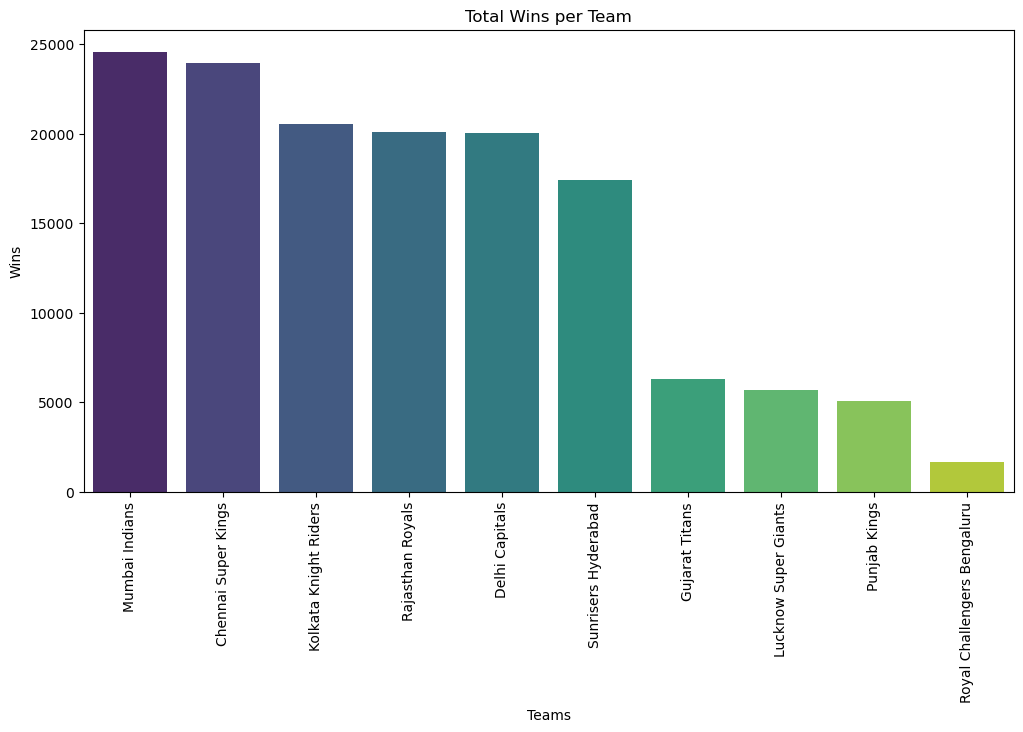

In [592]:
# Total Wins per Team
teams_win = df["winner"].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=teams_win.index, y=teams_win.values, palette='viridis')
plt.xticks(rotation=90)
plt.title("Total Wins per Team")
plt.xlabel("Teams")
plt.ylabel("Wins")
plt.show()

In [593]:
# Wins per team per season
wins_by_team_season = matches.groupby(['season', 'winner']).size().unstack(fill_value=0)
wins_by_team_season

winner,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Gujarat Titans,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,Pune Warriors,Punjab Kings,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Royal Challengers Bengaluru,Sunrisers Hyderabad
season,,,,,,,,,,,,,,,,,,,
2007/08,9,2,0,7,0,0,10,0,6,0,7,0,0,13,0,0,4,0,0
2009,8,9,0,10,0,0,7,0,3,0,5,0,0,6,0,0,9,0,0
2009/10,9,8,0,7,0,0,4,0,7,0,11,0,0,6,0,0,8,0,0
2011,11,6,0,4,0,0,7,6,8,0,10,4,0,6,0,0,10,0,0
2012,10,4,0,11,0,0,8,0,12,0,10,4,0,7,0,0,8,0,0
2013,12,0,0,3,0,0,8,0,6,0,13,4,0,11,0,0,9,0,10
2014,10,0,0,2,0,0,12,0,11,0,7,0,0,7,0,0,5,0,6
2015,10,0,0,5,0,0,3,0,7,0,10,0,0,7,0,0,8,0,7
2016,0,0,0,7,9,0,4,0,8,0,7,0,0,0,0,5,9,0,11


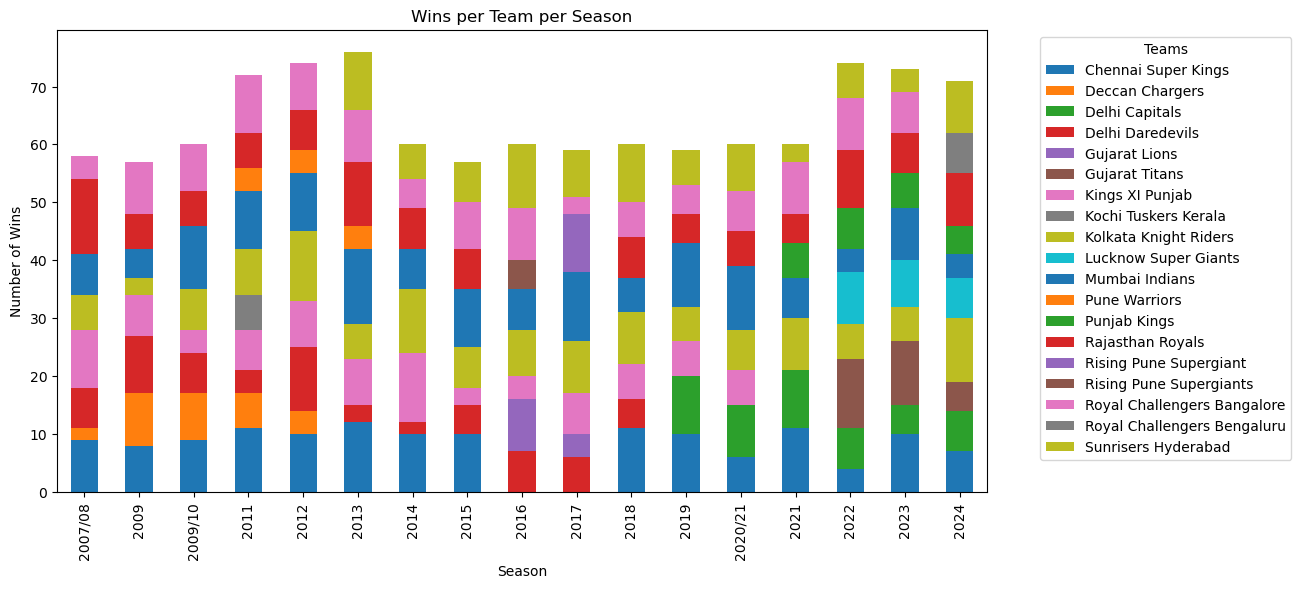

In [594]:
# Wins per Team per Season
wins_per_season = matches.groupby(['season', 'winner']).size().unstack()
wins_per_season.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Wins per Team per Season")
plt.xlabel("Season")
plt.ylabel("Number of Wins")
plt.legend(title="Teams", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Step 3: Head-to-Head Comparisons

In [595]:
# Compare two teams’ past performances, including batting, bowling, and win ratios.

def head_to_head(team1, team2):
    h2h_matches = matches[(matches['team1'].isin([team1, team2])) & 
                          (matches['team2'].isin([team1, team2]))]
    h2h_results = h2h_matches['winner'].value_counts()
    return h2h_results

#  Compare Mumbai Indians vs Chennai Super Kings
print(head_to_head("Mumbai Indians", "Chennai Super Kings"))


winner
Mumbai Indians         20
Chennai Super Kings    17
Name: count, dtype: int64


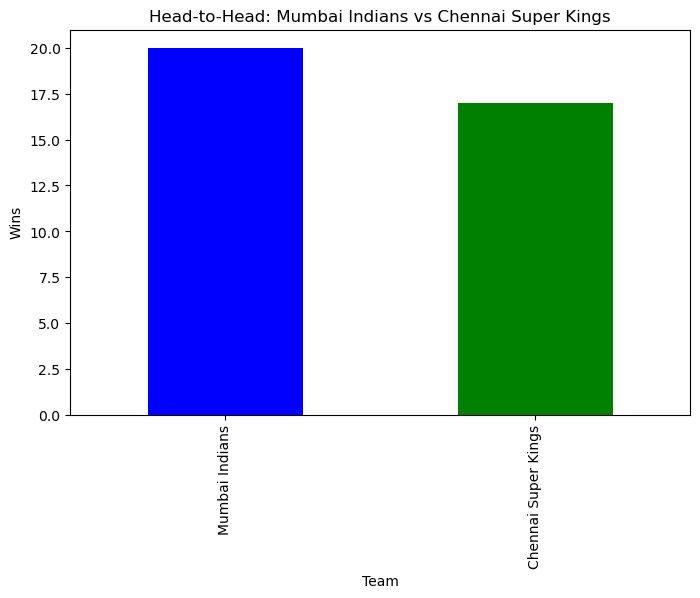

In [596]:
h2h_results = head_to_head("Mumbai Indians", "Chennai Super Kings")
h2h_results.plot(kind='bar', color=['blue', 'green'], figsize=(8, 5))
plt.title("Head-to-Head: Mumbai Indians vs Chennai Super Kings")
plt.xlabel("Team")
plt.ylabel("Wins")
plt.show()

## Step 4: Player Statistics & Rankings  
**Strike Rate:** strike_rate = (total_runs / balls_faced) * 100

Top 10 Batsmen by Runs:


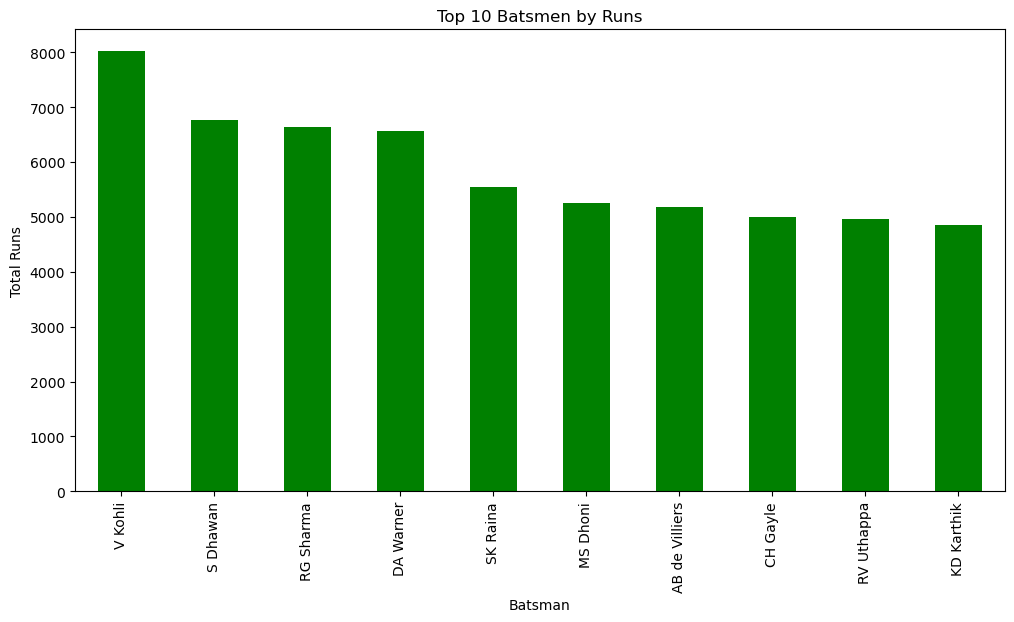

In [597]:
# Top Batsmen by Total Runs
batsman_runs = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False)
print("Top 10 Batsmen by Runs:")
batsman_runs = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False)
batsman_runs.head(10).plot(kind='bar', figsize=(12, 6), color='green')
plt.title("Top 10 Batsmen by Runs")
plt.xlabel("Batsman")
plt.ylabel("Total Runs")
plt.show()

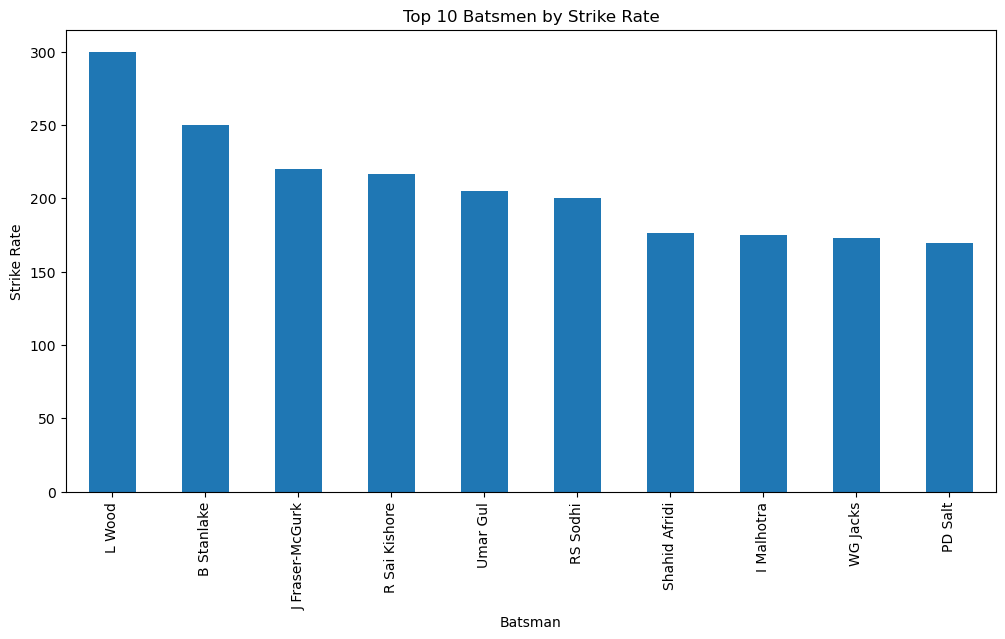

In [598]:
# Strike Rate Calculation
balls_faced = deliveries.groupby('batter').size()
strike_rate = (batsman_runs / balls_faced) * 100
strike_rate.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12, 6))
plt.title("Top 10 Batsmen by Strike Rate")
plt.xlabel("Batsman")
plt.ylabel("Strike Rate")
plt.show()

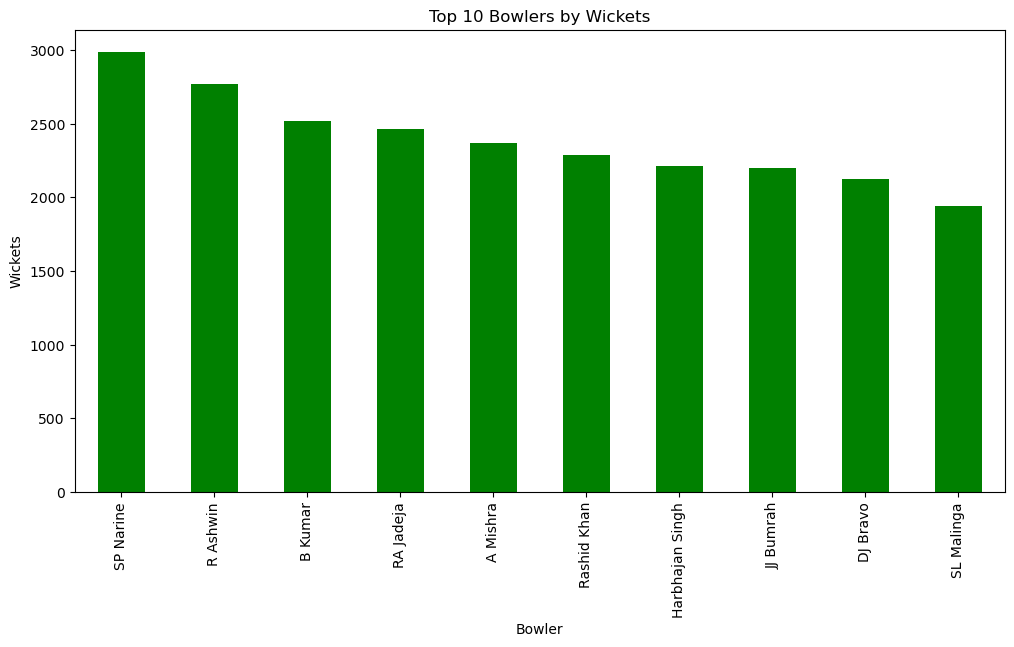

In [599]:
# Top Bowlers by Wickets
wickets = df[~df['dismissal_kind'].isin(['run out', 'retired hurt'])]
wicket_count = wickets.groupby('bowler').size().sort_values(ascending=False)
wicket_count.head(10).plot(kind='bar', figsize=(12, 6), color='g')
plt.title("Top 10 Bowlers by Wickets")
plt.xlabel("Bowler")
plt.ylabel("Wickets")
plt.show()

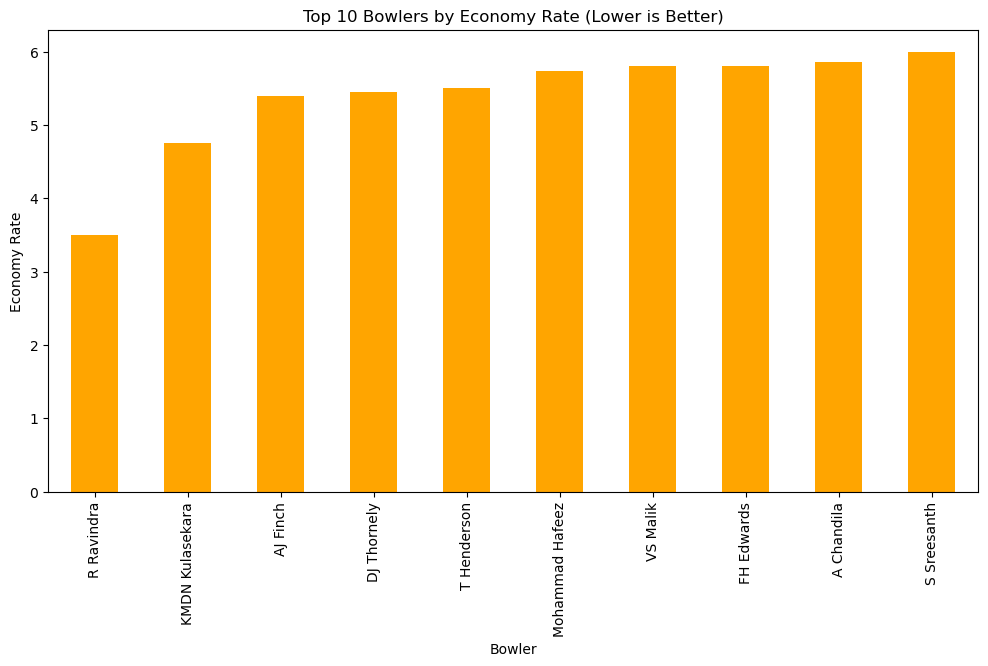

In [600]:
# Economy Rate: economy_rate = runs_conceded / (balls_bowled / 6)
# Economy Rate Calculation
runs_conceded = df.groupby('bowler')['total_runs'].sum()
balls_bowled = df.groupby('bowler').size()
economy_rate = (runs_conceded / (balls_bowled / 6)).sort_values()
economy_rate.head(10).plot(kind='bar', figsize=(12, 6), color='orange')
plt.title("Top 10 Bowlers by Economy Rate (Lower is Better)")
plt.xlabel("Bowler")
plt.ylabel("Economy Rate")
plt.show()


## Step 5: Venue & Toss Impact Study

In [601]:
# Toss impact at each venue
venue_toss = matches.groupby(['venue', 'toss_winner']).size().unstack(fill_value=0)
print("Toss Wins by Venue:")
venue_toss.head(2)

Toss Wins by Venue:


toss_winner,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Gujarat Titans,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,Pune Warriors,Punjab Kings,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Royal Challengers Bengaluru,Sunrisers Hyderabad
venue,,,,,,,,,,,,,,,,,,,
Arun Jaitley Stadium,1,0,4,3,0,0,0,0,1,0,1,0,0,2,0,0,1,0,1
"Arun Jaitley Stadium, Delhi",1,0,3,0,0,2,0,0,0,1,4,0,0,1,0,0,1,0,3


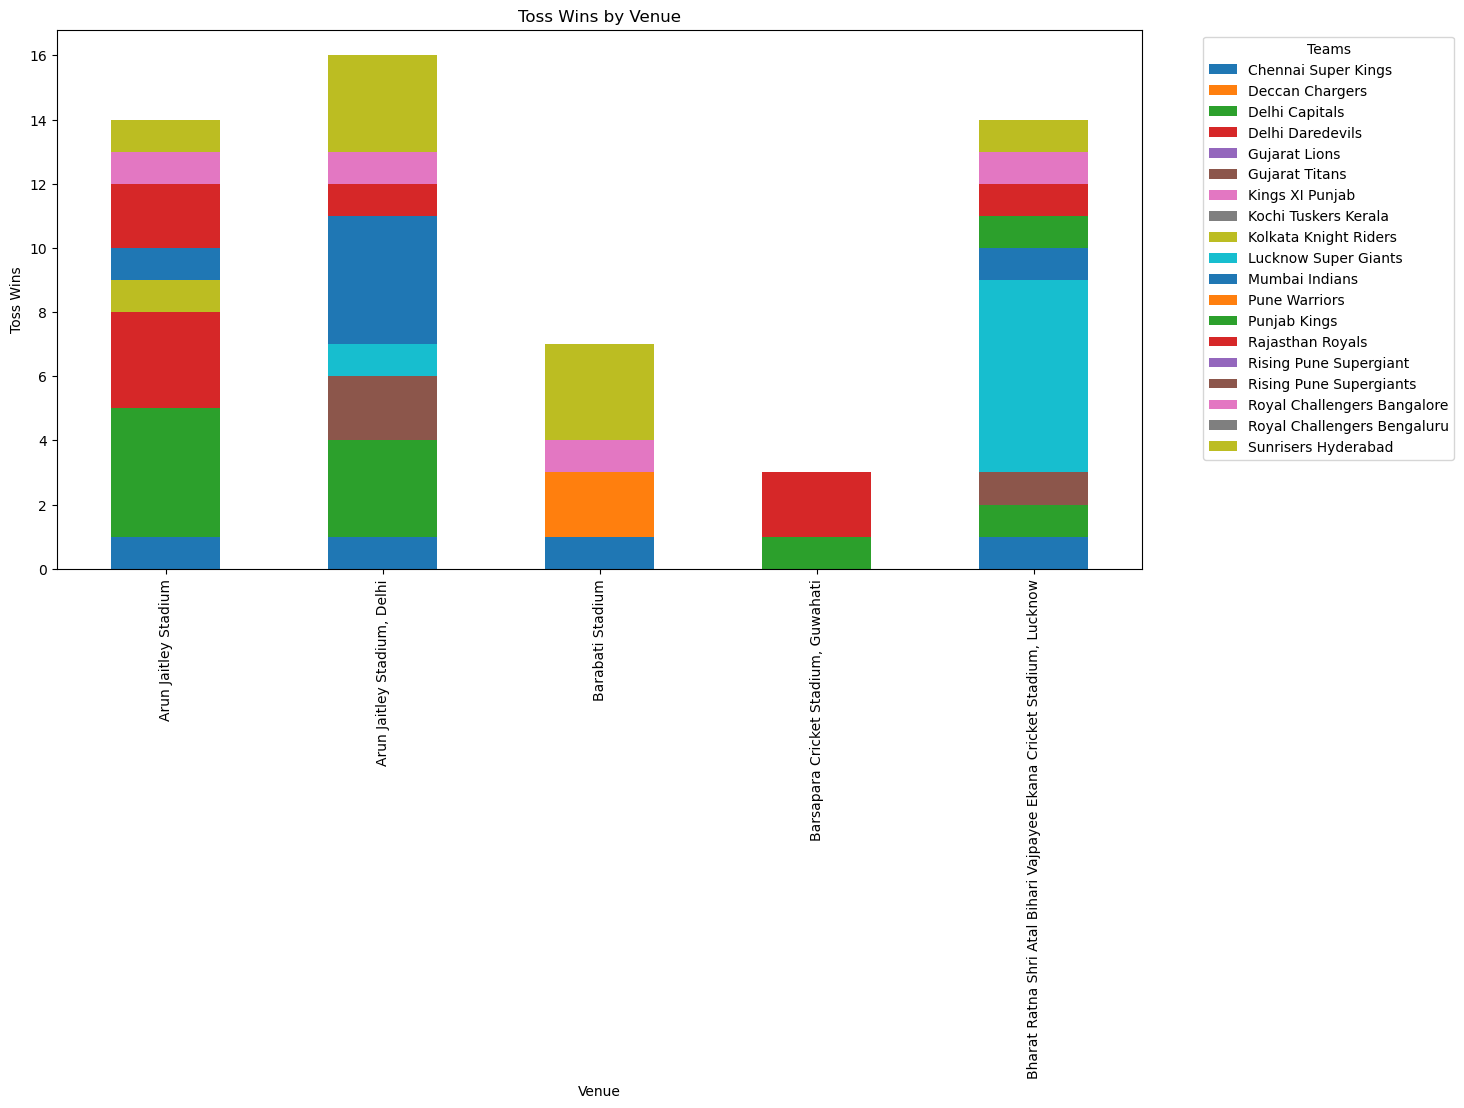

In [602]:
venue_toss.head().plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title("Toss Wins by Venue")
plt.xlabel("Venue")
plt.ylabel("Toss Wins")
plt.legend(title="Teams", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Model Predication
**Feature Engineering**


In [603]:
# Calculate current_score (cumulative runs per match and innings)
df['current_score'] = df.groupby(['match_id', 'inning'])['total_runs'].cumsum()

# Calculate balls_left (total balls remaining in the innings)
df['balls_left'] = 120 - ((df['over'] - 1) * 6 + df['ball'])

# Calculate target_runs for the second innings
df['target_runs'] = df.groupby('match_id')['total_runs'].transform(
    lambda x: x.iloc[:120].sum() + 1 if len(x) > 120 else 0
)

# For the first innings, set target_runs = 0
df.loc[df['inning'] == 1, 'target_runs'] = 0

# Calculate runs_left
df['runs_left'] = df['target_runs'] - df['current_score']
df['runs_left'] = df['runs_left'].clip(lower=0)

# Calculate rrr (required run rate)
df['rrr'] = (df['runs_left'] * 6) / df['balls_left']


# Filter out invalid rows (e.g., first innings or matches already won)
df = df[(df['inning'] == 2) & (df['runs_left'] > 0)]

# Calculate wickets
df['wickets'] = df.groupby(['match_id', 'inning'])['is_wicket'].cumsum()
# Calculate wickets_left
df['wickets_left'] = 10 - df['wickets']


In [604]:
df.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,winner,result,result_margin,target_runs,current_score,balls_left,runs_left,rrr,wickets,wickets_left
595,335984,2,Delhi Daredevils,Rajasthan Royals,0,1,G Gambhir,MM Patel,V Sehwag,0,...,Delhi Capitals,wickets,9.0,128,0,125,128,6.144000,0,10
596,335984,2,Delhi Daredevils,Rajasthan Royals,0,2,G Gambhir,MM Patel,V Sehwag,0,...,Delhi Capitals,wickets,9.0,128,0,124,128,6.193548,0,10


In [605]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'is_wicket', 'player_dismissed', 'dismissal_kind',
       'season', 'city', 'date', 'match_type', 'player_of_match', 'venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'target_runs', 'current_score', 'balls_left',
       'runs_left', 'rrr', 'wickets', 'wickets_left'],
      dtype='object')

In [606]:
# Add the result column
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [607]:
df['result'] = df.apply(result,axis=1)

In [608]:
# Display the DataFrame with new features
df.sample()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,winner,result,result_margin,target_runs,current_score,balls_left,runs_left,rrr,wickets,wickets_left
214107,1304071,2,Sunrisers Hyderabad,Kolkata Knight Riders,15,2,N Pooran,CV Varun,AK Markram,1,...,Sunrisers Hyderabad,1,7.0,160,142,34,18,3.176471,3,7


# Training the model


In [609]:
# Take the necessary column
final_data=df[["batting_team","bowling_team","city","target_runs","balls_left","wickets_left","total_runs","rrr","result"]]


In [610]:
final_data.sample()

,batting_team,bowling_team,city,target_runs,balls_left,wickets_left,total_runs,rrr,result
177281,Delhi Capitals,Rajasthan Royals,Delhi,107,121,10,1,5.057851,1


In [611]:
#Convert the categorical data into numeric
encoder=LabelEncoder()

In [612]:
final_data["city"]=encoder.fit_transform(final_data[["city"]])
final_data["batting_team"]=encoder.fit_transform(final_data[["batting_team"]])
final_data["bowling_team"]=encoder.fit_transform(final_data[["bowling_team"]])

In [613]:
final_data.shape

(68206, 9)

In [614]:
#Select the feature and target values
X=final_data.drop(["result"],axis=1)
Y=final_data[["result"]]

In [615]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [616]:
model=LogisticRegression()
model.fit(X_train,Y_train)


LogisticRegression()

In [617]:
pred=model.predict(X_test)

In [618]:
accuracy_score(Y_test,pred)

0.7413135903826419

In [619]:
model.predict_proba(X_test)

array([[0.71341724, 0.28658276],
       [0.76194168, 0.23805832],
       [0.21492227, 0.78507773],
       ...,
       [0.48162166, 0.51837834],
       [0.60701271, 0.39298729],
       [0.69851699, 0.30148301]])

In [620]:
print("Classification_report =\n ",classification_report(Y_test,pred))

Classification_report =
                precision    recall  f1-score   support

           0       0.77      0.76      0.76      7492
           1       0.71      0.71      0.71      6150

    accuracy                           0.74     13642
   macro avg       0.74      0.74      0.74     13642
weighted avg       0.74      0.74      0.74     13642



In [621]:
final_data.head(2)

,batting_team,bowling_team,city,target_runs,balls_left,wickets_left,total_runs,rrr,result
595,3,9,10,128,125,10,0,6.144000,0
596,3,9,10,128,124,10,0,6.193548,0


# Predication
**0 --> lose**  
**1 --> win**

In [622]:
model.predict([[16,	8,	2,213,125,10,1,10.176000]])

array([0], dtype=int64)

In [623]:
# Same data but change some values 
model.predict([[16,	8,	2,213,125,10,44,16.176000]])

array([0], dtype=int64)

In [624]:
# Same data but change some values (Change the runs)
model.predict([[16,	8,	2,212,125,10,98,10.176000]])

# It change the from 98 runs to win 

array([0], dtype=int64)

In [625]:
# Same data but change some values (6 wicket left) 
model.predict([[16,	8,	2,212,125,6,98,10.176000]])

# It change the from 98 runs to win 

array([0], dtype=int64)

In [626]:
#Save the model
import pickle
import pickle
pickle.dump(model,open('IPL_model.pkl','wb'))

In [627]:
final_data.columns

Index(['batting_team', 'bowling_team', 'city', 'target_runs', 'balls_left',
       'wickets_left', 'total_runs', 'rrr', 'result'],
      dtype='object')